In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
# import mlgrad.risks as risks
import mlgrad.regr as regr
import mlgrad.inventory as inventory
import mlgrad.plots as plots

In [3]:
df = pd.read_csv("data/animals.csv", sep=",")
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [4]:
X = np.log(df.body.values)
Y = np.log(df.brain.values)
Xs = X.reshape(-1,1)

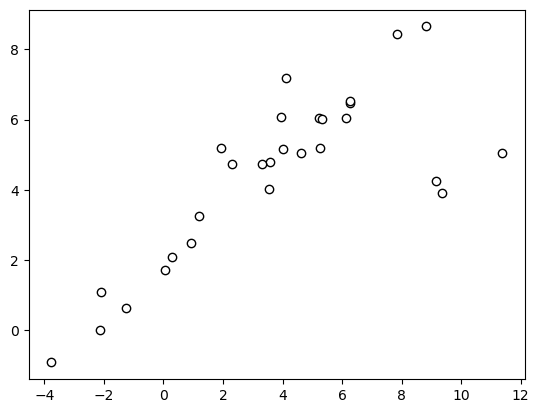

In [5]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.show()

In [6]:
linmod1 = models.LinearModel(1)
alg1 = regr.r_regression_irls(X[:,None], Y, linmod1, rho_func=funcs.SoftAbs_Sqrt(0.001), h=0.001)
print(np.asarray(linmod1.param))

[1.878 0.741]


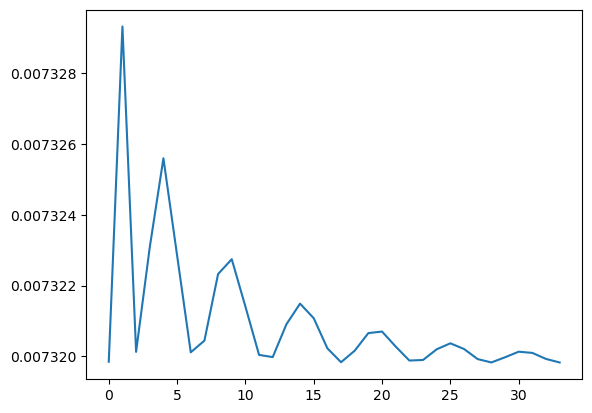

In [7]:
plt.plot(alg1.lvals)
plt.show()

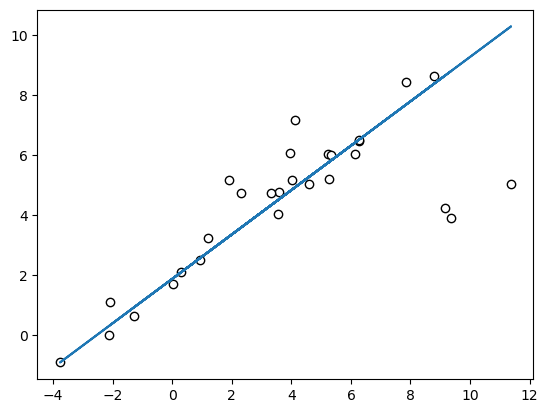

In [8]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod1.evaluate(Xs))
plt.show()

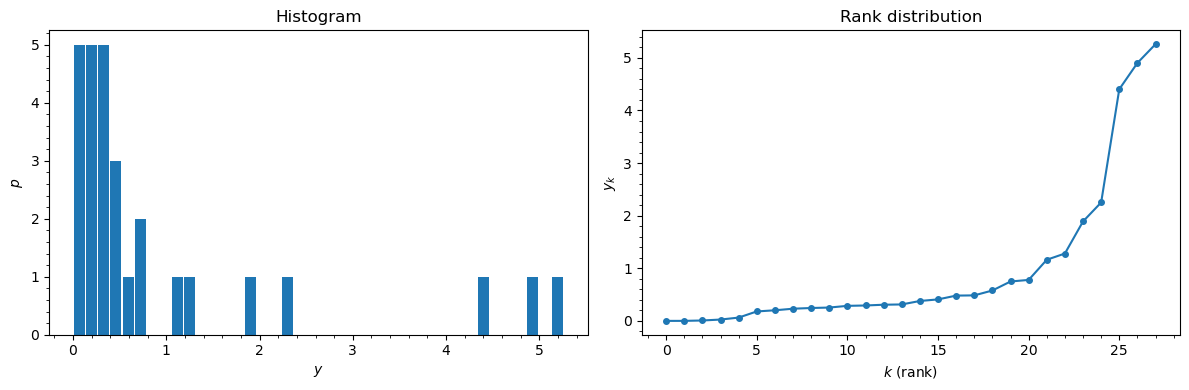

In [19]:
E = abs(Y - linmod1.evaluate(X[:,None]))
plots.plot_hist_and_rank_distribution(E)

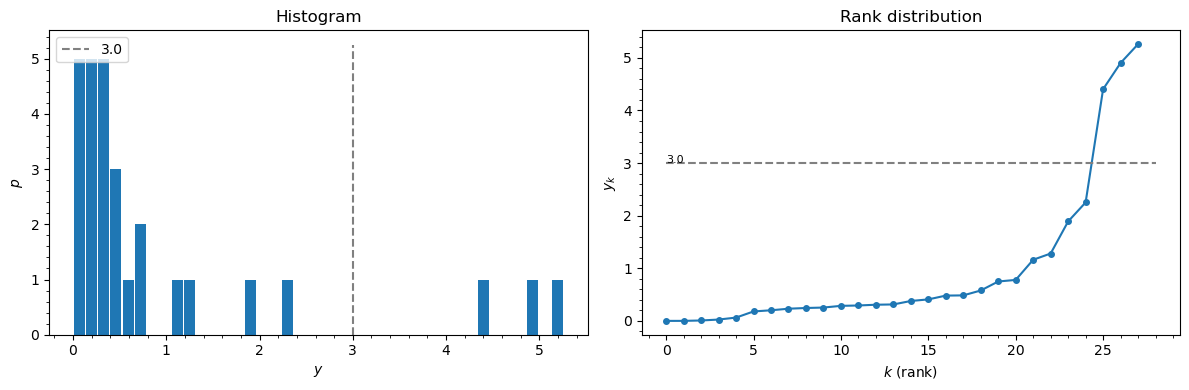

In [21]:
Z = inventory.zscore(E)
plots.plot_hist_and_rank_distribution(E, levels=[3.0])

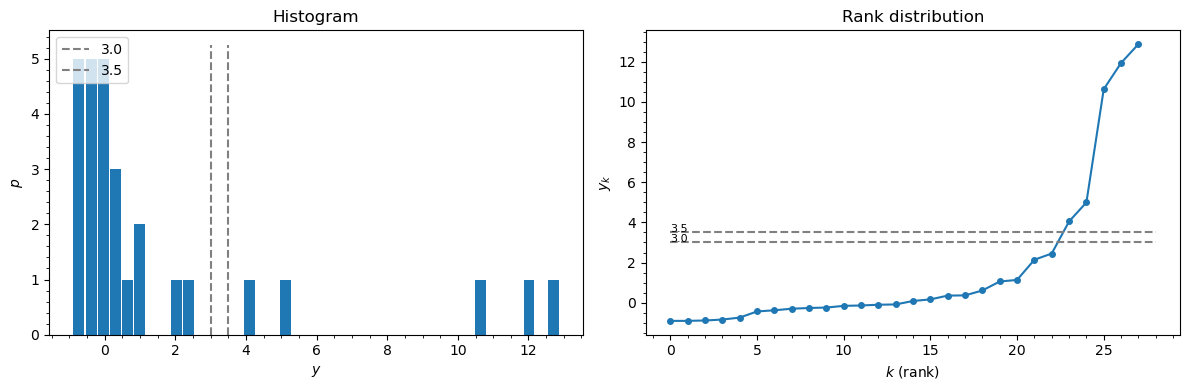

In [22]:
Z1 = inventory.modified_zscore(abs(Y - linmod1.evaluate(X[:,None])))
plots.plot_hist_and_rank_distribution(Z1, levels=[3.0, 3.5])